# Python w badaniach humanistycznych
## Zajęcia 5

Zaczniemy (już chyba) jak zwykle od zaciągnięcia materiałów z GitHuba.

(0a) Linuksowcy/Macowcy przechodzą terminalem do katalogu, w którym sklonowaliśmy materiały do zajęć (repozytorium o nazwie `kurs-pythona-2017Z-<login-githubowy>`) - `cd ~/tutaj/mam/ten/katalog/kurs-pythona-2017Z-piotrkasprzyk`.

(0b) Windowsowcy uruchamiają Git Bash, a potem przechodzą tamże - `cd /c/Users/ja/Pulpit/kurs-pythona-2017Z-piotrkasprzyk`.

(1) `git fetch upstream`

(2) `git checkout master`

(3) `git stash`

(4) `git merge upstream/master`

(5) `git stash pop`

Powinniśmy wzbogacić się o pliki `2018-01-09/zajecia.ipynb` (ćwiczenia na zajęciach), `2018-01-09/slajdy.ipynb` (materiały z wykładu) i `2018-01-09/praca_domowa.ipynb`.

## Korzystanie z zasobów internetowych - HTML
Ciąg dalszy z poprzednich zajęć

## Tagi HTML, które się w życiu przydają
### (lista niewyczerpująca)
* `head` - nagłówek strony (metadane)
* `body` - ciało strony (część widoczna)
* `a` - hiperłącze (w węźle tekstowym treść linka, w atrybucie `href` adres, do którego prowadzi)
* `div`, `span` - "elementy" na stronie; ich sens często oddaje atrybut `class` lub `id`
* `ol`, `ul` - odpowiednio lista numerowana i nienumerowana
* `li` - element listy
* `table` - tabela
* `tr` - wiersz w tabeli
* `td`, `th` - odpowiednio "zwykła" i nagłówkowa komórka tabeli

## Ćwiczenie 1: Policz, ile jest wierszy w tabelkach
na stronie https://en.wikipedia.org/wiki/List_of_Roman_hoards_in_Great_Britain

## Ćwiczenie 2: Policz, ile rzymskich skarbów zostało znalezionych w Wielkiej Brytanii
i powiedz czemu to inne ćwiczenie niż 1.

## Ćwiczenie 3: Policz, ile spośród skarbów jest przechowywanych w Londynie

## Ćwiczenie 4: Zbuduj słownik: nazwa miejsca przechowywania skarbu (klucz) na liczbę skarbów przechowywanych w tym miejscu (wartość)

## Podstawowe wykresy
"Domyślna" biblioteka do wykresów w pythonie to `matplotlib`. Pozwala w miarę prosto robić w miarę proste wykresy - które możemy potem mniej prosto upiększać.

In [1]:
from matplotlib import pyplot as plt  # "import as" pozwala odwoływać się do zaimportowanej biblioteki przez inną nazwę

plt.rcdefaults()
plt.clf()

data = [2, 1, 1, 1, 207, 1, 59, 16, 3, 6]
names = ['Bolesław', 'Prus', 'Lalka', 'Tom', 'I', 'I.', 'Jak', 'wygląda', 'firma', 'J.']

plt.title("Liczba wystąpień słów")
plt.plot(data, linewidth=2)

plt.xticks(range(len(names)), names, rotation=90)
plt.xlabel("Próbki")
plt.ylabel("Liczba wystąpień")

Text(0,0.5,'Liczba wystąpień')

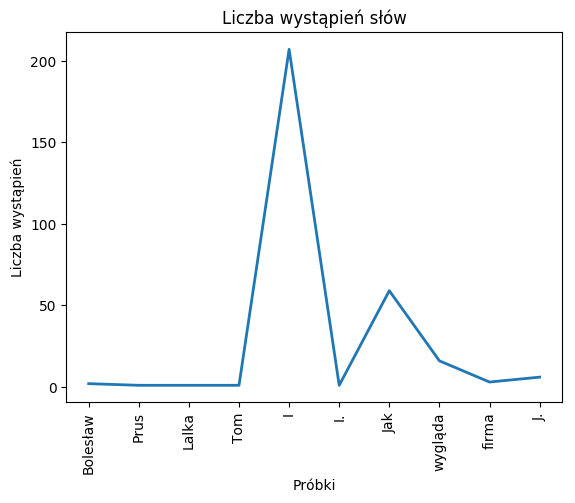

In [2]:
plt.show()

In [3]:
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.clf()

data = [2, 1, 1, 1, 207, 1, 59, 16, 3, 6]
names = ['Bolesław', 'Prus', 'Lalka', 'Tom', 'I', 'I.', 'Jak', 'wygląda', 'firma', 'J.']

plt.title("Liczba wystąpień słów")
for idx, value in enumerate(data):
    plt.bar(idx, value)

plt.xticks(range(len(names)), names, rotation=90)
plt.xlabel("Próbki")
plt.ylabel("Liczba wystąpień")

Text(0,0.5,'Liczba wystąpień')

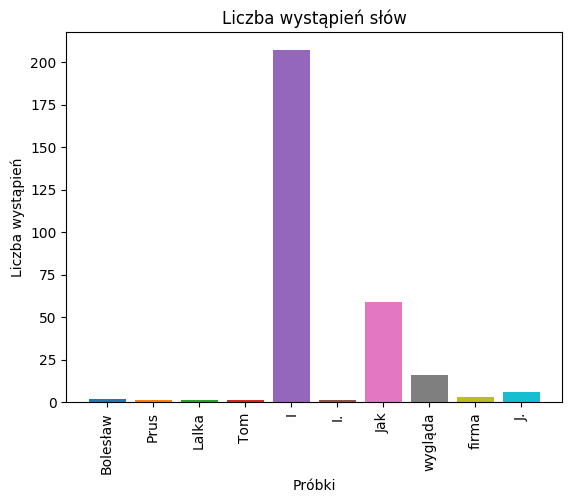

In [4]:
plt.show()

In [5]:
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.clf()

data = [2, 1, 1, 1, 59, 1, 27, 16, 3, 6]
names = ['Bolesław', 'Prus', 'Lalka', 'Tom', 'I', 'I.', 'Jak', 'wygląda', 'firma', 'J.']

plt.title("Liczba wystąpień słów")
plt.pie(data, labels=names)
plt.axis('equal')

(-1.1086612516200367,
 1.1004124550465146,
 -1.1312322282522094,
 1.1104732651696723)

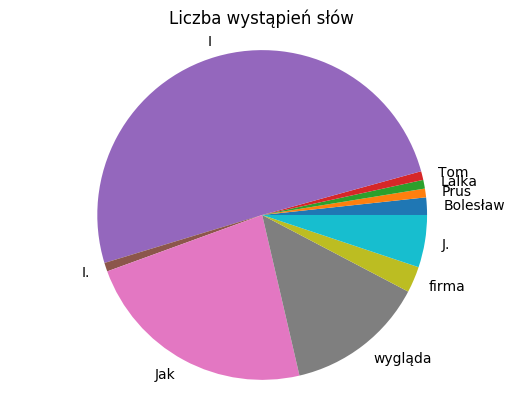

In [6]:
plt.show()

## Ćwiczenie 5: Zrób wykres słupkowy w oparciu o słownik z ćwiczenia 4

## Wykresy inaczej
Alternatywną biblioteką jest `plotly`. Jest zaprojektowana jako bardziej "sexi" i domyślnie tworzy bardziej interaktywne wykresy.

In [7]:
import plotly.offline as py
import plotly.graph_objs as go

data = [2, 1, 1, 1, 207, 1, 59, 16, 3, 6]
names = ['Bolesław', 'Prus', 'Lalka', 'Tom', 'I', 'I.', 'Jak', 'wygląda', 'firma', 'J.']

bars = []
for d, n in zip(data, names):
    bars.append(go.Bar(
        x=[n],
        y=[d],
        width=0.5,
        opacity=0.7,
        name=n,
    ))

fig = go.Figure(data=bars)

In [8]:
py.init_notebook_mode(connected=True)
py.iplot(fig)

## Ćwiczenie 6: Zrób wykres słupkowy z ćwiczenia 5 w plotly

## Ćwiczenie 7: Utwórz listę nazw skarbów, lat ich odkrycia i współrzędnych geograficznych odkrycia
Weź pod uwagę tylko te skarby, dla których Wikipedia zna te współrzędne.

## Podstawy podstaw map
`Plotly` pozwala też na proste zaznaczanie punktów na mapie - należy tylko pamiętać o tym, że jest to funkcja niejako "przy okazji" biblioteki do wykresów.

In [9]:
import plotly.offline as py
import plotly.graph_objs as go

points = [
    ('Kraków',   (50.06465, 19.94498)),
    ('Warszawa', (52.22967, 21.01223)),
    ('Gdańsk',   (54.35202, 18.64664)),
]

data = []
for name, coords in points:
    data.append(go.Scattergeo(
        lon=[coords[1]],
        lat=[coords[0]],
        text='Niezwykle ważne miasto',
        marker=dict(
            size=15,
        ),
        name=name,
    ))

layout = go.Layout(
    title='Miasta w Polsce',
    geo=dict(
        resolution=50,
        projection=dict(type='mercator'),
        showland=True,
        showcountries=True,
        lonaxis=dict(range=[13, 25]),
        lataxis=dict(range=[48, 56]),
    ),
)

fig = go.Figure(layout=layout, data=data)

In [10]:
py.init_notebook_mode(connected=True)
py.iplot(fig)

## Ćwiczenie 8: Tak, zaznacz na mapie dane z ćwiczenia 7.

## Bonus z poprzednich zajęć: korespondencja seryjna

In [11]:
import smtplib
import getpass

# msg_text = '\r\n'.join([
#     'From: Zaphod Beeblebrox <zaphod@gov.galaxy>',
#     'To: Piotr Kasprzyk <p.kasprzyk@uw.edu.pl>',
#     'Subject: Testowy mail',
#     'Drogi Piotrze,',
#     'Piszę właśnie do Ciebie w ważnej sprawie',
#     '    Pozdrawiam',
#     '    JA']).encode('utf-8')

# my_address = 'p.kasprzyk@lach.edu.pl'

# connection = smtplib.SMTP('smtp.lach.edu.pl', 587)
# connection.ehlo()
# connection.starttls()
# passwd = getpass.getpass()
# print(connection.login(my_address, passwd))

# connection.sendmail('p.kasprzyk@lach.edu.pl', 'p.kasprzyk@uw.edu.pl', msg_text)
# connection.quit()

''

''

## Dla chętnych/zainteresowanych
W pliku `xpath.ipynb` znajdują się liczne przykłady na użycie xpath.

## Następne zajęcia: 23 stycznia 2018, 16:30
### Praca domowa znajduje się w pliku `2018-01-09/praca_domowa.ipynb` i jest nieduża. Niech jej uzupełnieniem będzie ponowne przeczytanie ze zrozumieniem ćwiczeń z dzisiejszych zajęć.
Proszę o wrzucenie pracy domowej do swojego repozytorium do 20 stycznia 2018 (sobota), do godziny 23:59.